<a href="https://colab.research.google.com/github/roshank1605A04/Stock-Market-Predictions/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_data.shape
training_data.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [3]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [4]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)


In [5]:
# Getting the inputs and outputs

x_train = training_data[0:1257]
y_train = training_data[1:1258]

print(x_train.shape)
print(y_train.shape)


(1257, 1)
(1257, 1)


In [6]:
# reshaping

x_train = np.reshape(x_train, (1257, 1, 1))

print(x_train.shape)

(1257, 1, 1)


In [7]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [8]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)


Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.9384
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.7437
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.5862
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4601
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.3608
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2827
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2230
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1771
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1431
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.1179
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0998
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0866
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 9.9825e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 9.2811e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 8.6979e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 8.1439e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 7.6956e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 7.3103e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 6.9832e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 6.7020e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 6.4604e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step - loss: 6.2705e-04
Epoch 111/200
40/40 [==============================] - 0s 2ms/step - loss: 6.1062e-04
Epoch 112/200
40/40 [==============================] - 0s 2ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 3.3631e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 3.3461e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 3.3201e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2992e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2985e-04


In [9]:
# getting the real stock of 2017 i.e., importing the test dataset

test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [10]:
# getting the predicted stock price of 2017

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)


In [11]:
predicted_stock_price

array([[767.4921 ],
       [775.1687 ],
       [773.3458 ],
       [780.64703],
       [789.3704 ],
       [790.5025 ],
       [788.28235],
       [789.9445 ],
       [790.208  ],
       [789.898  ],
       [788.9122 ],
       [788.37573],
       [789.7661 ],
       [790.0298 ],
       [801.5596 ],
       [807.0672 ],
       [813.1515 ],
       [810.8582 ],
       [795.7411 ],
       [781.9092 ]], dtype=float32)

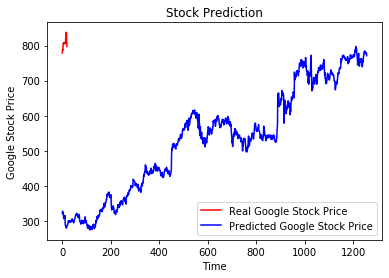

In [22]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [23]:
# getting the real stock price of 2012 - 2016

training_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [25]:
# getting the predicted stock price of 2012-2016

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

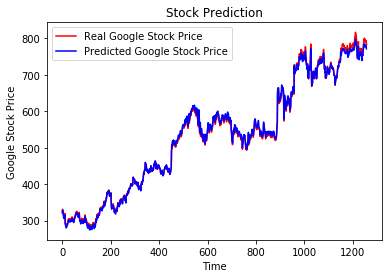

In [26]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()